In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [5]:
class AgentState(TypedDict):
    values: List[str]
    name: str
    result: str


In [9]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"

    print(state)
    return state

In [10]:
graph = StateGraph(AgentState)
graph.add_node("processor",process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

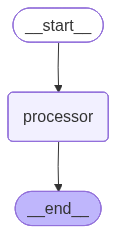

In [8]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
res = app.invoke({"values": [1,2,3,4,5], "name": "Alice"})

{'values': [1, 2, 3, 4, 5], 'name': 'Alice'}
{'values': [1, 2, 3, 4, 5], 'name': 'Alice', 'result': 'Hi there Alice! Your sum = 15'}


In [13]:
print(res["result"])

Hi there Alice! Your sum = 15


In [15]:
# exercies - 2

# 1. Create a function that takes in a list of numbers and a string operation ("sum" or "product") and returns the result of that operation on the list.
# 2. Build a StateGraph that uses this function as a node, allowing users to specify the operation and the list of numbers as inputs.
# 3. Test the graph with different inputs to ensure it works correctly for both operations. 

from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    numbers: List[int]
    name: str
    operation: str
    result: str

def compute(state: AgentState) -> AgentState:
    """This function computes sum or product based on the operation specified"""
    
    if state["operation"] == "+":
        state["result"]= f"Hi {state['name']}! The sum is {sum(state['numbers'])}"
    elif state["operation"] == "*":
        pro = 1
        for num in state["numbers"]:
            pro *= num
        state["result"]= f"Hi {state['name']}! The product is {pro}"
    else:
        state["result"]= "Invalid operation"
    
    return state
    

In [16]:
graph= StateGraph(AgentState)
graph.add_node("compute_node", compute)
graph.set_entry_point("compute_node")
graph.set_finish_point("compute_node")

app= graph.compile()

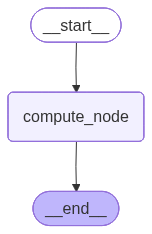

In [17]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({"numbers": [1,2,3,4], "name": "Bob", "operation": "*"})
print(result["result"])

Hi Bob! The product is 24
